In [ ]:
import pandas as pd
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

## Сравнение Дерева и Случайного Леса

In [ ]:
#@title Код генерации датасета с занятия
def devil(N, D=2, K=3):
    N = 100
    D = 2
    K = 3
    X = np.zeros((N * K, D))
    y = np.zeros(N * K, dtype='uint8')

    for j in range(K):
        ix = range(N * j,N * (j + 1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j

    X[:, 0] += np.random.normal(loc=0, scale=0.15, size=300)
    X[:, 1] += np.random.normal(loc=0, scale=0.15, size=300)
    return X, y

In [ ]:
X, y = devil(100)

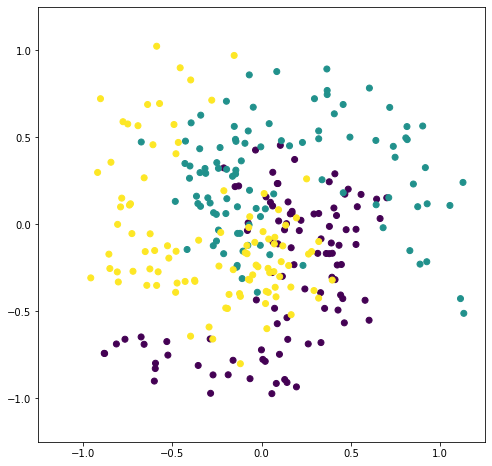

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(X[:,0], X[:,1], c=y)

plt.xlim([-1.25, 1.25])
plt.ylim([-1.25, 1.25])

plt.show()

In [ ]:
models = [DecisionTreeClassifier(max_depth=10), 
          RandomForestClassifier(max_depth=10)]

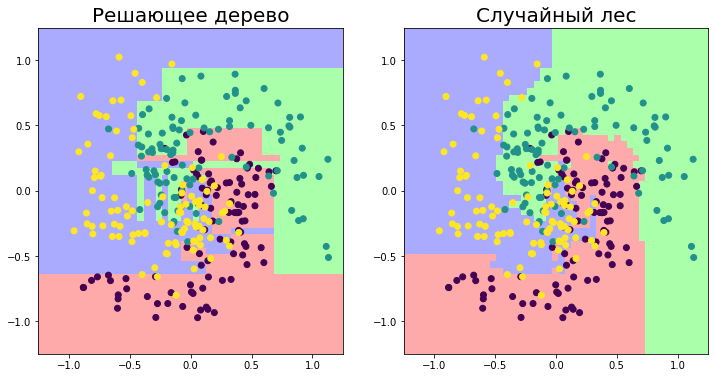

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Max depth = 7')

name = {0:'Решающее дерево', 1:'Случайный лес'}
for i, model in enumerate(models):
    model.fit(X, y)

    plt.subplot(1, 2, i+1)
    plt.xlim((-1.25, 1.25))
    plt.ylim((-1.25, 1.25))
    xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 50),
                         np.linspace(-1.25, 1.25, 50))
    plt.gca().set_title(name[i], fontsize=20)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Загрузка и исследование данных

https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?resource=download&select=train.csv

In [ ]:
df = pd.read_csv('https://dl.uploadgram.me/62def1f38f9cbh?raw')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c3d7d6e50>,
      dtype=object)

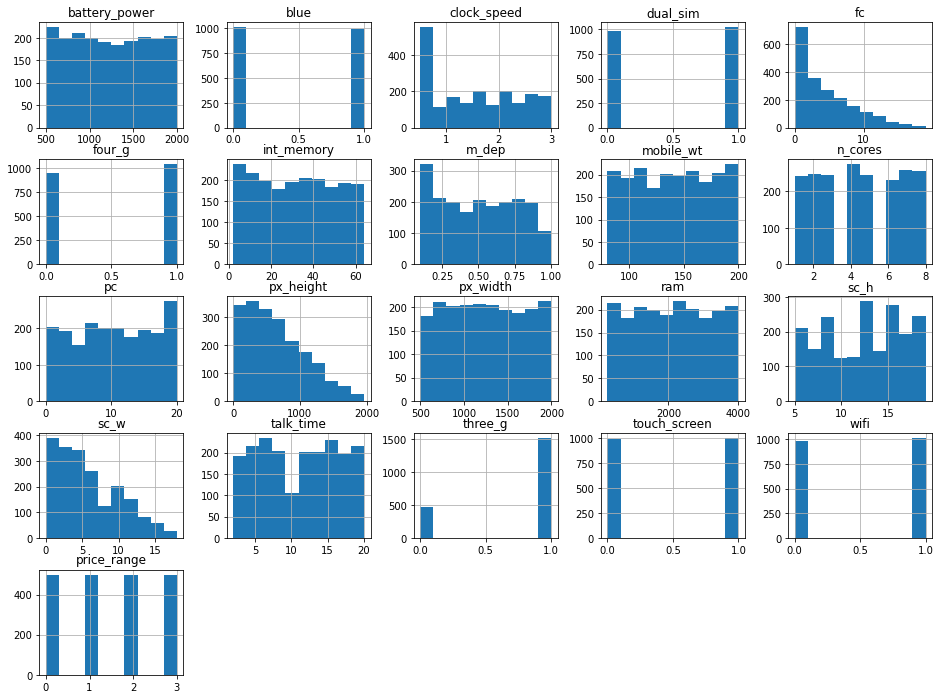

In [ ]:
df.hist(figsize=(16, 12))

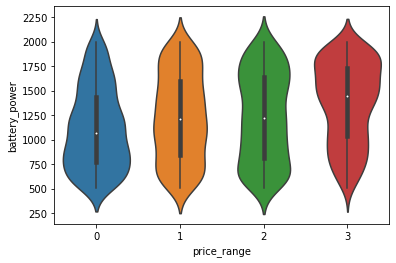

In [ ]:
import seaborn as sns

sns.violinplot(x="price_range", y='battery_power', data=df)

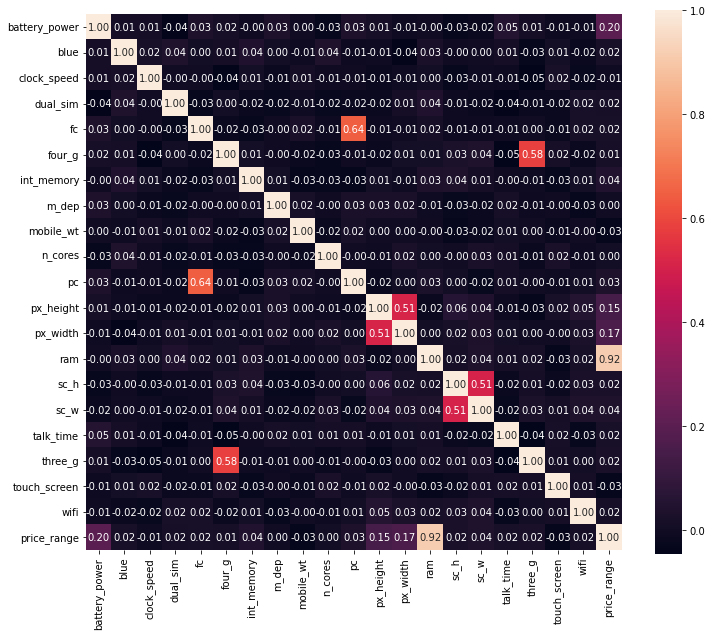

In [ ]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(),fmt='.2f', square = True, annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['price_range']), df['price_range'], test_size=0.2)

# создание и обучение алгоритма
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report

preds = rf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       105
           1       0.83      0.81      0.82       106
           2       0.78      0.81      0.80        96
           3       0.92      0.88      0.90        93

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



In [ ]:
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [ ]:
preds = rf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.86      0.87      0.86       106
           2       0.82      0.81      0.82        96
           3       0.91      0.89      0.90        93

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [ ]:
X_test.iloc[:5]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1972,1191,0,0.8,0,6,1,46,0.8,89,6,9,42,807,824,19,18,7,1,0,0
859,623,0,2.0,0,2,0,6,0.1,127,3,4,144,672,3657,17,3,19,1,1,0
384,625,1,1.9,0,12,1,33,0.2,191,1,20,431,550,3801,10,6,2,1,0,0
1053,623,1,0.9,0,1,1,3,0.1,102,8,7,1749,1781,3537,16,13,3,1,0,1
297,1329,1,1.0,0,1,0,52,0.9,181,6,2,1053,1458,1228,8,6,6,1,0,1


In [ ]:
print('Предсказания:')
print(rf.predict(X_test.iloc[0:5,].values))
print('Реальные ответ:')
y_test[:5].values

Предсказания:
[0 2 3 3 1]
Реальные ответ:


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0, 2, 2, 3, 1])

## Сравнение с другими алгоритмами

In [ ]:
from sklearn.linear_model import LogisticRegression

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
preds = tree.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.80      0.85      0.83       106
           2       0.80      0.78      0.79        96
           3       0.90      0.86      0.88        93

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [ ]:
preds = lr.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       105
           1       0.57      0.62      0.60       106
           2       0.52      0.46      0.49        96
           3       0.68      0.78      0.73        93

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.66      0.65      0.65       400

